# COGS 108 - Final Project 

## Names & PID

- Christopher Guan (A13513127)
- Diana Issatayeva (A15541440)
- Angela Liu       (A14400029)
- Ana Palma        (A13737577)
- Melody Xue       (A12782726)

# Introduction & Background

### Overview

We wanted to better understand the factors that correlate to obesity. There have been various studies done in the past showing a high correlation between income and obesity. So instead of solely focusing on income, we wanted to focus on factors that do not have obvious correlation to obesity level such as education level, recreation/gym facility density, and access to stores. 

### Research Question

How do factors such as access to grocery stores, recreation/fitness facility density, and education levels correlate with obesity levels in the United States? 

### Background and Prior Work

We are interested in analyzing the prevalence of obesity in the United States and how it is influenced by environmental and educational factors. A sedentary lifestyle has become the norm for most working Americans. Much of their time is spent sitting either at work or at home. Due to demanding work schedules, people lack the time and energy to pursue active lifestyles. The modern work life has also contributed to poor eating habits characterized by high calorie foods and large portion sizes. People in general do not have time to prepare healthy, home cooked meals every day. The convenience of fast food has made it a popular alternative. Lack of physical activity and poor diet choices have largely influenced obesity in the United States.

"Inequality in the Built Environment Underlies Key Health Disparities" describes a study conducted at the University of Minnesota that aimed to assess the geographic and social distributions of physical activity facilities and their relationship to obesity. It was revealed that groups with lower socio-economic status were less likely to have facilities around their neighborhoods, which in turn was associated with decreased physical activity and increased overweight.

In "Neighborhood Impact on Healthy Food Availability and Pricing in Food Stores," the author examines the impact of price and availability of healthy food in food stores and its correlation to obesity, cardiovascular diseases and cancer. The study indicated that a key factor in obesity prevention is the accessibility to grocery stores with healthy food options; however, large chain supermarkets stray away from opening in lower income neighborhoods. 

Although, education allows for more food opportunities, Micheal Gard and Jan Wright's study described in "Managing Uncertainty: Obesity Discourses and Physical Education in a Risk Society" argues how 
how obesity could be a product of expert knowledge taught in physical education classes; this may construct anxiety surrounding body images, and in turn be detrimental to students. We want to examine the consequences and possible correlations between education and obesity. 

Despite fitness facility density being correlated to socio-economic status, we will not analyze income as a determining factor for obesity. We aim to find the correlation between factors that directly influence obesity, such as access to grocery stores and gym facilities. It is likely that easier access to these things will enable people to choose healthier lifestyles, thereby preventing obesity. There is insufficient evidence that obesity is directly caused by socio-economic status, but with sufficient data analysis, it is possible to show correlation with the other factors previously mentioned. 

Various studies have also shown that obesity is correlated with education. Individuals with lower income or education levels are more likely to suffer from obesity due to their lack of awareness on harmful eating habits and their inability to afford healthier food options. 

References (include links):
- 1) Inequality in the Built Environment Underlies Key Health Disparities in Physical Activity and Obesity [https://pediatrics.aappublications.org/content/117/2/417]
- 2) Managing Uncertainty: Obesity Discourses and Physical Education in a Risk Society [https://link.springer.com/article/10.1023/A:1012238617836]
- 3) Neighborhood Impact on Healthy Food Availability and Pricing in Food Stores [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3071013/]

### Hypothesis


We hypothesize that higher education would negatively correlate with obesity the most. Higher education leads to higher paying jobs and thus more opportunities and economic freedom to buy healthier food option. Because eating healthy is often more expensive in the United States, people with lower incomes or less education are more likely to lean towards cheaper fast food options. 

# Dataset(s)

We will analyze two sources of data from the United States Department of Agriculture Economic Research Service:

 
1) 
- Dataset Name: Food Environment Atlas 
- Link: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads.aspx
- Number of observations: ~3000

2) 
- Dataset Name: Education 
- Link:  https://www.ers.usda.gov/data-products/county-level-data-sets/
- Number of observations: ~3000 

Each of these datasets has roughly 3000 observations as they are organized by all of the different counties in the United States. Coming from a federal government department, it is a trustworthy dataset that will provide us granular and enough data to be able to draw conclusions on our question.  

The Food Environment Atlas provides us with 278 variables regarding poverty rate, percentage of races, and food assistance programs that we can use to analyze and help us answer our question. Although we might use more factors available to us in this dataset as we continue to work on the project, we wanted to focus on a smaller number to begin with. In particular, these variables aim to give us a better idea of what kind of resources are available to each county. The variables we will be using include PCT_OBSESE_ADULTS13 (adult obesity rate 2013), GROC14 (grocery stores 2014), GROCPTH14 (grocery stores per one thousand population 2014), REFFAC14 (recreation facilities 2014), and RECFACPTH14 (recreation facilities per one thousand population 2014).

The Education dataset has 31 variables, corresponding to various years that data was collected and 4 different levels of education: less than high school diploma, high school diploma, some college, and Bachelor's degree or higher. These 4 levels are described with percentage of adults and population count who have achieved the different levels of education. Because we also wanted to consider factors that are not directly related to food and health, analyzing a population’s education level would produce new insights into if it is a factor in or has a correlation to obesity. 

We will be merging the two datasets together by finding the corresponding county codes in each of the datasets. 

# Setup

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

# Libraries needed for maps
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff

init_notebook_mode(connected=True)

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ModuleNotFoundError: No module named 'plotly'

# Data Cleaning

We dropped unneccessary columns in education and food environment datasets. Next, we removed the null values and merged the datasets by matching the FPID (standard county code).

### Education Dataset Cleaning

In [2]:
xls_Education = pd.ExcelFile("Education.xls")
df_ed = xls_Education.parse('Education')
display(df_ed)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,27.4,24.4,27437114.0,59093612.0,NaN,66887603.0,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,25.9,19.0,481059.0,1012551.0,979449.0,803578.0,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,26.9,18.0,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,29.3,23.1,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,21.3,10.9,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,20.4,7.1,2833.0,6958.0,3971.0,2097.0,17.9,43.9,25.0,13.2
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,24.8,9.6,7980.0,12740.0,13583.0,5172.0,20.2,32.3,34.4,13.1
7,1011,AL,Bullock County,6.0,6.0,6.0,6.0,4245.0,958.0,305.0,...,17.5,7.7,2113.0,2699.0,1575.0,990.0,28.6,36.6,21.4,13.4
8,1013,AL,Butler County,6.0,6.0,6.0,6.0,8353.0,2459.0,499.0,...,22.9,10.4,2645.0,5637.0,3423.0,2253.0,18.9,40.4,24.5,16.1
9,1015,AL,Calhoun County,3.0,2.0,3.0,2.0,30535.0,13804.0,3823.0,...,26.4,15.2,13254.0,25440.0,26168.0,14113.0,16.8,32.2,33.1,17.9


In [3]:
# Drop columns from previous years and keep most recent (2013-2017)
list(df_ed)

df_ed=df_ed.drop(['2003 Urban Influence Code','2013 Rural-urban Continuum Code','2003 Rural-urban Continuum Code','2013 Urban Influence Code','Less than a high school diploma, 1970',
 'High school diploma only, 1970',
 'Some college (1-3 years), 1970',
 'Four years of college or higher, 1970',
 'Percent of adults with less than a high school diploma, 1970',
 'Percent of adults with a high school diploma only, 1970',
 'Percent of adults completing some college (1-3 years), 1970',
 'Percent of adults completing four years of college or higher, 1970',
 'Less than a high school diploma, 1980',
 'High school diploma only, 1980',
 'Some college (1-3 years), 1980',
 'Four years of college or higher, 1980',
 'Percent of adults with less than a high school diploma, 1980',
 'Percent of adults with a high school diploma only, 1980',
 'Percent of adults completing some college (1-3 years), 1980',
 'Percent of adults completing four years of college or higher, 1980',
 'Less than a high school diploma, 1990',
 'High school diploma only, 1990',
 "Some college or associate's degree, 1990",
 "Bachelor's degree or higher, 1990",
 'Percent of adults with less than a high school diploma, 1990',
 'Percent of adults with a high school diploma only, 1990',
 "Percent of adults completing some college or associate's degree, 1990",
 "Percent of adults with a bachelor's degree or higher, 1990",
 'Less than a high school diploma, 2000',
 'High school diploma only, 2000',
 "Some college or associate's degree, 2000",
 "Bachelor's degree or higher, 2000",
 'Percent of adults with less than a high school diploma, 2000',
 'Percent of adults with a high school diploma only, 2000',
 "Percent of adults completing some college or associate's degree, 2000",
 "Percent of adults with a bachelor's degree or higher, 2000",],axis=1)

# Display the new dataframe and the column names
display(df_ed)
list(df_ed)

,FIPS Code,State,Area name,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,27437114.0,59093612.0,NaN,66887603.0,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,481059.0,1012551.0,979449.0,803578.0,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0
5,1007,AL,Bibb County,2833.0,6958.0,3971.0,2097.0,17.9,43.9,25.0,13.2
6,1009,AL,Blount County,7980.0,12740.0,13583.0,5172.0,20.2,32.3,34.4,13.1
7,1011,AL,Bullock County,2113.0,2699.0,1575.0,990.0,28.6,36.6,21.4,13.4
8,1013,AL,Butler County,2645.0,5637.0,3423.0,2253.0,18.9,40.4,24.5,16.1
9,1015,AL,Calhoun County,13254.0,25440.0,26168.0,14113.0,16.8,32.2,33.1,17.9


['FIPS Code',
 'State',
 'Area name',
 'Less than a high school diploma, 2013-17',
 'High school diploma only, 2013-17',
 "Some college or associate's degree, 2013-17",
 "Bachelor's degree or higher, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 'Percent of adults with a high school diploma only, 2013-17',
 "Percent of adults completing some college or associate's degree, 2013-17",
 "Percent of adults with a bachelor's degree or higher, 2013-17"]

In [4]:
# Rename the FIPS column name to be able to merge later
df_ed=df_ed.rename(index=str, columns={"FIPS Code": "FIPS", })

### Food Environmental Atlas Dataset Cleaning

We extract only the data that we want to use in our analysis from the Atlas.

In [5]:
# Read in the data from Food Evironmental Atlas excel spreadsheet into pandas data frame
stores_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='STORES')
health_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='HEALTH')
income_df = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name='SOCIOECONOMIC')

In [6]:
# Separate the neccessary columns from the table
stores_var_list = ['GROC14', 'GROCPTH14', 'FIPS']
stores_df = stores_df[stores_var_list]

health_var_list = ['PCT_OBESE_ADULTS13', 'RECFAC14', 'RECFACPTH14', 'FIPS']
health_df = health_df[health_var_list]

income_var_list = ['MEDHHINC15','FIPS']
income_df = income_df[income_var_list]

In [7]:
stores_df

,GROC14,GROCPTH14,FIPS
0,4,0.072209,1001
1,29,0.144920,1003
2,5,0.185963,1005
3,5,0.222163,1007
4,6,0.103952,1009
5,2,0.185805,1011
6,3,0.147812,1013
7,27,0.232927,1015
8,7,0.205423,1017
9,5,0.192034,1019


In [8]:
health_df

,PCT_OBESE_ADULTS13,RECFAC14,RECFACPTH14,FIPS
0,34.1,5,0.090261,1001
1,27.4,25,0.124931,1003
2,44.4,0,0.000000,1005
3,40.3,1,0.044433,1007
4,34.6,3,0.051976,1009
5,43.0,0,0.000000,1011
6,36.3,1,0.049271,1013
7,32.2,7,0.060389,1015
8,39.7,0,0.000000,1017
9,33.6,1,0.038407,1019


In [9]:
income_df

,MEDHHINC15,FIPS
0,56580.0,1001
1,52387.0,1003
2,31433.0,1005
3,40767.0,1007
4,50487.0,1009
5,28251.0,1011
6,33868.0,1013
7,42091.0,1015
8,35560.0,1017
9,39144.0,1019


In [10]:
# Merging two Atlas dataframes on FIPS column
df_merged = stores_df.merge(health_df, left_on='FIPS', right_on='FIPS')
df_merged = df_merged.merge(income_df, left_on='FIPS', right_on='FIPS')

In [11]:
# Put FIPS column first 
# Get a list of columns
cols = list(df_merged)

# Move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('FIPS')))
df_merged = df_merged.loc[:, cols]
df_merged

,FIPS,GROC14,GROCPTH14,PCT_OBESE_ADULTS13,RECFAC14,RECFACPTH14,MEDHHINC15
0,1001,4,0.072209,34.1,5,0.090261,56580.0
1,1003,29,0.144920,27.4,25,0.124931,52387.0
2,1005,5,0.185963,44.4,0,0.000000,31433.0
3,1007,5,0.222163,40.3,1,0.044433,40767.0
4,1009,6,0.103952,34.6,3,0.051976,50487.0
5,1011,2,0.185805,43.0,0,0.000000,28251.0
6,1013,3,0.147812,36.3,1,0.049271,33868.0
7,1015,27,0.232927,32.2,7,0.060389,42091.0
8,1017,7,0.205423,39.7,0,0.000000,35560.0
9,1019,5,0.192034,33.6,1,0.038407,39144.0


In [12]:
# Rename the column names to be more clear
df_merged = df_merged.rename(index=str, columns={"GROC14": "GROC_STORES_COUNT_2014", "GROCPTH14": "GROC_STORES_PER1000_2014", "PCT_OBESE_ADULTS13": "ADULT_OBESITY_RATE_2013", "RECFAC14": "RECREATION_FITNESS_FACIL_COUNT_2014", "RECFACPTH14": "RECREATION_FITNESS_FACIL_PER1000_2014" })

In [13]:
# rename the median income column
df_merged = df_merged.rename(index=str, columns={'MEDHHINC15': 'Median_household_income_2015'})

In [14]:
# Check for data types from the Atlas dataset
df_merged.dtypes

FIPS                                       int64
GROC_STORES_COUNT_2014                     int64
GROC_STORES_PER1000_2014                 float64
ADULT_OBESITY_RATE_2013                  float64
RECREATION_FITNESS_FACIL_COUNT_2014        int64
RECREATION_FITNESS_FACIL_PER1000_2014    float64
Median_household_income_2015             float64
dtype: object

In [15]:
# Check for data types from the Education dataset
df_ed.dtypes

FIPS                                                                          int64
State                                                                        object
Area name                                                                    object
Less than a high school diploma, 2013-17                                    float64
High school diploma only, 2013-17                                           float64
Some college or associate's degree, 2013-17                                 float64
Bachelor's degree or higher, 2013-17                                        float64
Percent of adults with less than a high school diploma, 2013-17             float64
Percent of adults with a high school diploma only, 2013-17                  float64
Percent of adults completing some college or associate's degree, 2013-17    float64
Percent of adults with a bachelor's degree or higher, 2013-17               float64
dtype: object

In [16]:
# Merging the Education and Food Environmental Atlas dataframes together on FIPS column
df = df_ed.merge(df_merged, left_on='FIPS', right_on='FIPS')
display(df)

,FIPS,State,Area name,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",GROC_STORES_COUNT_2014,GROC_STORES_PER1000_2014,ADULT_OBESITY_RATE_2013,RECREATION_FITNESS_FACIL_COUNT_2014,RECREATION_FITNESS_FACIL_PER1000_2014,Median_household_income_2015
0,1001,AL,Autauga County,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0,4,0.072209,34.1,5,0.090261,56580.0
1,1003,AL,Baldwin County,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7,29,0.144920,27.4,25,0.124931,52387.0
2,1005,AL,Barbour County,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0,5,0.185963,44.4,0,0.000000,31433.0
3,1007,AL,Bibb County,2833.0,6958.0,3971.0,2097.0,17.9,43.9,25.0,13.2,5,0.222163,40.3,1,0.044433,40767.0
4,1009,AL,Blount County,7980.0,12740.0,13583.0,5172.0,20.2,32.3,34.4,13.1,6,0.103952,34.6,3,0.051976,50487.0
5,1011,AL,Bullock County,2113.0,2699.0,1575.0,990.0,28.6,36.6,21.4,13.4,2,0.185805,43.0,0,0.000000,28251.0
6,1013,AL,Butler County,2645.0,5637.0,3423.0,2253.0,18.9,40.4,24.5,16.1,3,0.147812,36.3,1,0.049271,33868.0
7,1015,AL,Calhoun County,13254.0,25440.0,26168.0,14113.0,16.8,32.2,33.1,17.9,27,0.232927,32.2,7,0.060389,42091.0
8,1017,AL,Chambers County,4537.0,9109.0,6894.0,3158.0,19.1,38.4,29.1,13.3,7,0.205423,39.7,0,0.000000,35560.0
9,1019,AL,Cherokee County,3850.0,7179.0,5424.0,2344.0,20.5,38.2,28.9,12.5,5,0.192034,33.6,1,0.038407,39144.0


Next, we want to reduce the 4 columns of education data to 2: either having some college or higher OR having high school or less. We want to see how the effects of having a college education and analyze how different education levels can affect obesity rates.

In [17]:
# Create and add a new column for % adults w/ a high school diploma or less
df['HIGH_SCHOOL'] =  df[['Percent of adults with less than a high school diploma, 2013-17', 'Percent of adults with a high school diploma only, 2013-17']].sum(axis=1)

# Create and add a new column for % adults w/ some college or higher
df['COLLEGE'] =  df[['Percent of adults completing some college or associate\'s degree, 2013-17', 'Percent of adults with a bachelor\'s degree or higher, 2013-17']].sum(axis=1)

In [18]:
# Display the columns in the final, merged dataframe
list(df)

['FIPS',
 'State',
 'Area name',
 'Less than a high school diploma, 2013-17',
 'High school diploma only, 2013-17',
 "Some college or associate's degree, 2013-17",
 "Bachelor's degree or higher, 2013-17",
 'Percent of adults with less than a high school diploma, 2013-17',
 'Percent of adults with a high school diploma only, 2013-17',
 "Percent of adults completing some college or associate's degree, 2013-17",
 "Percent of adults with a bachelor's degree or higher, 2013-17",
 'GROC_STORES_COUNT_2014',
 'GROC_STORES_PER1000_2014',
 'ADULT_OBESITY_RATE_2013',
 'RECREATION_FITNESS_FACIL_COUNT_2014',
 'RECREATION_FITNESS_FACIL_PER1000_2014',
 'Median_household_income_2015',
 'HIGH_SCHOOL',
 'COLLEGE']

In [19]:
df

,FIPS,State,Area name,"Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",GROC_STORES_COUNT_2014,GROC_STORES_PER1000_2014,ADULT_OBESITY_RATE_2013,RECREATION_FITNESS_FACIL_COUNT_2014,RECREATION_FITNESS_FACIL_PER1000_2014,Median_household_income_2015,HIGH_SCHOOL,COLLEGE
0,1001,AL,Autauga County,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0,4,0.072209,34.1,5,0.090261,56580.0,45.9,54.1
1,1003,AL,Baldwin County,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7,29,0.144920,27.4,25,0.124931,52387.0,37.6,62.4
2,1005,AL,Barbour County,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0,5,0.185963,44.4,0,0.000000,31433.0,62.4,37.5
3,1007,AL,Bibb County,2833.0,6958.0,3971.0,2097.0,17.9,43.9,25.0,13.2,5,0.222163,40.3,1,0.044433,40767.0,61.8,38.2
4,1009,AL,Blount County,7980.0,12740.0,13583.0,5172.0,20.2,32.3,34.4,13.1,6,0.103952,34.6,3,0.051976,50487.0,52.5,47.5
5,1011,AL,Bullock County,2113.0,2699.0,1575.0,990.0,28.6,36.6,21.4,13.4,2,0.185805,43.0,0,0.000000,28251.0,65.2,34.8
6,1013,AL,Butler County,2645.0,5637.0,3423.0,2253.0,18.9,40.4,24.5,16.1,3,0.147812,36.3,1,0.049271,33868.0,59.3,40.6
7,1015,AL,Calhoun County,13254.0,25440.0,26168.0,14113.0,16.8,32.2,33.1,17.9,27,0.232927,32.2,7,0.060389,42091.0,49.0,51.0
8,1017,AL,Chambers County,4537.0,9109.0,6894.0,3158.0,19.1,38.4,29.1,13.3,7,0.205423,39.7,0,0.000000,35560.0,57.5,42.4
9,1019,AL,Cherokee County,3850.0,7179.0,5424.0,2344.0,20.5,38.2,28.9,12.5,5,0.192034,33.6,1,0.038407,39144.0,58.7,41.4


# Data Analysis & Results

Each point on the following scatter plots represents one of the counties in the United States.

## Obesity Rate vs. Recreation/Fitness Facilities Per 1000 People

Here, we plot the obesity rate against how many recreation/fitness facilities a county has per 1000 people to give us an idea about how facility access can affect obesity rates.

In [43]:
rec_mean = df['RECREATION_FITNESS_FACIL_PER1000_2014'].mean(axis=0)
rec_median = df['RECREATION_FITNESS_FACIL_PER1000_2014'].median(axis=0)
rec_min = df['RECREATION_FITNESS_FACIL_PER1000_2014'].min()
rec_max = df['RECREATION_FITNESS_FACIL_PER1000_2014'].max()

print("Rec/Fitness Facilities Per 1000 People --- Avg:", rec_mean, "Median:", rec_median, "Min:", rec_min, "Max", rec_max)

Rec/Fitness Facilities Per 1000 People --- Avg: 0.0688520866001 Median: 0.0610165 Min: 0.0 Max 0.822368421


### Scatter Plot & Regression Line

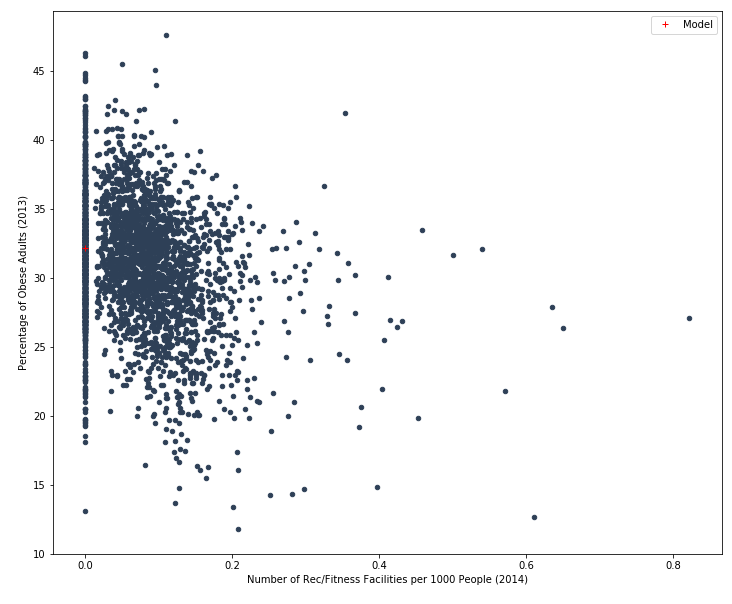

In [48]:
df.plot.scatter(x='RECREATION_FITNESS_FACIL_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#2E4057', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['RECREATION_FITNESS_FACIL_PER1000_2014'].min(), df['RECREATION_FITNESS_FACIL_PER1000_2014'].max())
ys = 32.1909 - 17.105 * xs
plt.plot(xs, ys, 'r+', linewidth=10, label='Model')

plt.xlabel('Number of Rec/Fitness Facilities per 1000 People (2014)\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.legend();

#### Refining the graph
The above plot shows number of recreation facilities against the perecentage of obsese adults.  We noticed that the points beyond 0.4 of the x-axis are rather sparse. The points beyond 0.4 number of rec/fitness facilities per 1000 people were removed to refine the graph. 

In [49]:
def standardize_percentage(number):
    return (number * 100);

In [50]:
#threshold at 0.4 since most of the data points fall behind that point
df2 = df[df['RECREATION_FITNESS_FACIL_PER1000_2014'] <= 0.4]

#multiply x by 100 to make # of facilities per 100 so both axes are in %
df2['RECREATION_FITNESS_FACIL_PER1000_2014'] = df2['RECREATION_FITNESS_FACIL_PER1000_2014'].apply(standardize_percentage)

#remove 0
df2 = df2.dropna(axis=0, how='any', subset=['RECREATION_FITNESS_FACIL_PER1000_2014', 'ADULT_OBESITY_RATE_2013'])

#for y > 15 since most data points fall after that point
df2 = df2[df2['ADULT_OBESITY_RATE_2013'] > 15]

#doesn't make sense to do log transform since we are working with percentages
#plot data
# df2.plot.scatter(x='RECREATION_FITNESS_FACIL_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#2E4057', figsize=(12,10))

#we plotted the graph again and noticed reset the threshold at 20 since most of the data points fall behind that point
df2 = df2[df2['RECREATION_FITNESS_FACIL_PER1000_2014'] <= 20]
#remove 0
df2 = df2[df2['RECREATION_FITNESS_FACIL_PER1000_2014'] >= 0.1]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [51]:
#OLS regression with cleaned data
outcome2, predictors2 = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ RECREATION_FITNESS_FACIL_PER1000_2014', df2)
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()
print(res2.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.103
Model:                                 OLS   Adj. R-squared:                  0.103
Method:                      Least Squares   F-statistic:                     230.8
Date:                     Mon, 10 Jun 2019   Prob (F-statistic):           2.01e-49
Time:                             13:27:01   Log-Likelihood:                -5694.1
No. Observations:                     2007   AIC:                         1.139e+04
Df Residuals:                         2005   BIC:                         1.140e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

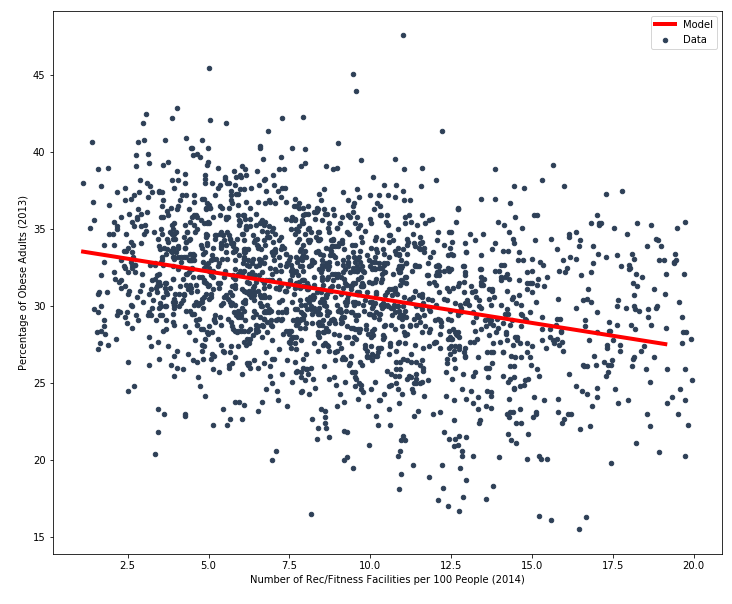

In [52]:
## Plot the model fit line

# Plot the orginal data (as before)
df2.plot.scatter(x='RECREATION_FITNESS_FACIL_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#2E4057', figsize=(12,10), label = 'Data')

# Generate and plot the model fit line
xs2 = np.arange(df2['RECREATION_FITNESS_FACIL_PER1000_2014'].min(), df2['RECREATION_FITNESS_FACIL_PER1000_2014'].max())
ys2 = -0.3338 * xs2 + 33.9236
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model', color='r', linestyle='-')

plt.xlabel('Number of Rec/Fitness Facilities per 100 People (2014)\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.legend();

After we refined the graph, we plotted the regression line. We have used the "Number of Recreation/Fitness Facilities per 100 People' to represent the density of gyms within a population. The P-value for acess to fitness facilities is 0.0, which is enough evidence to refute the null hypothesis with a threshold of 0.05, meaning that there is a significant correlation between obesity levels and access to fitness facilities. 
The coefficient of  -0.3338 ± 0.002 shows a negative correlation between access to gym facilites and obesity levels.
Our regression model accounts for 10.3% of the the variance in our data.

## Obesity Rate vs. Grocery Stores Per 1000 People

Here, we plot the obesity rate against how many groceries store a county has per 1000 people to give us an idea about how grocery store access can affect obesity rates.

In [ ]:
groc_mean = df['GROC_STORES_PER1000_2014'].mean(axis=0)
groc_median = df['GROC_STORES_PER1000_2014'].median(axis=0)
groc_min = df['GROC_STORES_PER1000_2014'].min()
groc_max = df['GROC_STORES_PER1000_2014'].max()

print("Grocery Stores Per 1000 People --- Avg:", groc_mean, "Median:", groc_median, "Min:", groc_min, "Max", groc_max)

### Scatter Plot & Regression Line

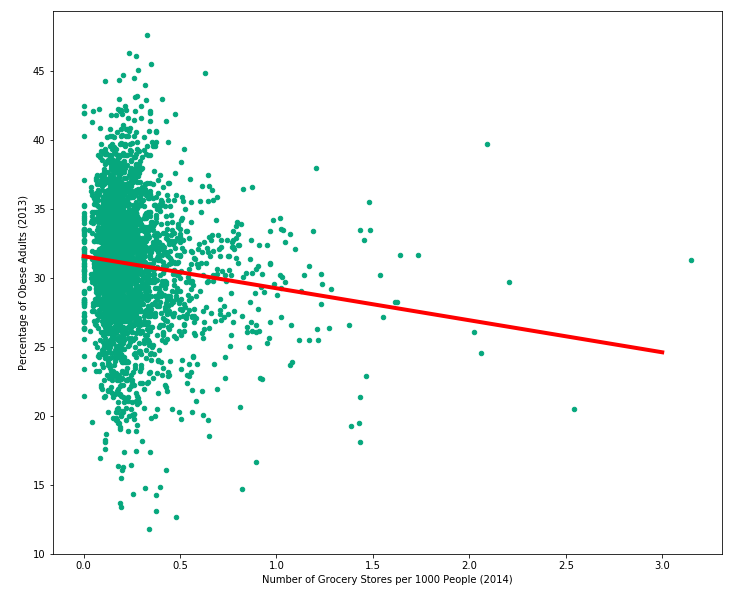

In [53]:
df.plot.scatter(x='GROC_STORES_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#06A77D', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['GROC_STORES_PER1000_2014'].min(), df['GROC_STORES_PER1000_2014'].max())
ys =  31.5963 - 2.32 * xs
plt.plot(xs, ys, 'r', linewidth=4, label='Model')

plt.xlabel('Number of Grocery Stores per 1000 People (2014)\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

### Refining the graph
We preformed a similar procedure as the previous graph to remove outliers. We removed datapoints beyond the 1.0 threshold on the x-axis. 

In [54]:
#threshold at 1.0 since most of the data points fall behind that point
df2 = df2[df2['GROC_STORES_PER1000_2014'] <= 1.0]

#multiply x by 100 to make # of facilities per 100 so both axes are in %
df2['GROC_STORES_PER1000_2014'] = df2['GROC_STORES_PER1000_2014'].apply(standardize_percentage)

#remove 0
df2 = df2[df2['GROC_STORES_PER1000_2014'] >= 0.01]


In [55]:
# OLS Regression for Grocery Stores Per 1000 People
outcome2, predictors2 = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ GROC_STORES_PER1000_2014', df2)
mod2 = sm.OLS(outcome2, predictors2)
res2 = mod2.fit()
print(res2.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.007
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     13.62
Date:                     Mon, 10 Jun 2019   Prob (F-statistic):           0.000229
Time:                             13:28:07   Log-Likelihood:                -5786.5
No. Observations:                     2003   AIC:                         1.158e+04
Df Residuals:                         2001   BIC:                         1.159e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

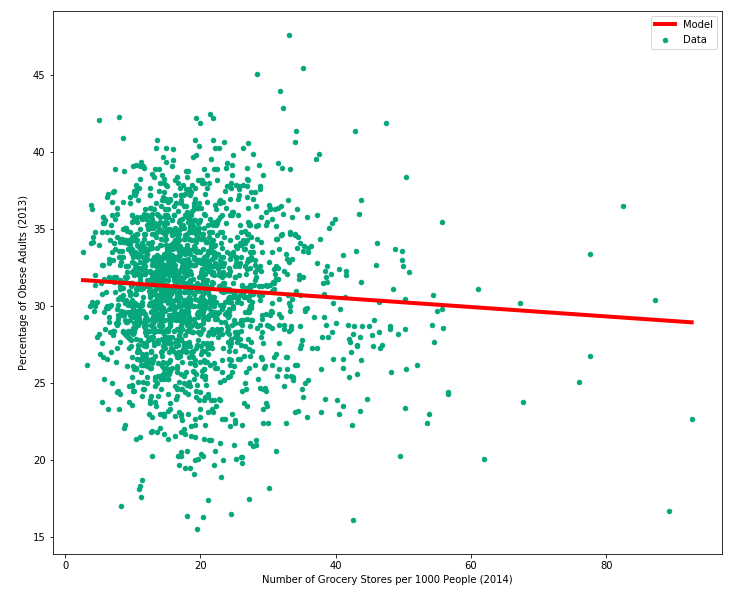

In [56]:
df2.plot.scatter(x='GROC_STORES_PER1000_2014', y='ADULT_OBESITY_RATE_2013', c='#06A77D', figsize=(12,10), label = 'Data')

# Plot model fit line
xs2 = np.arange(df2['GROC_STORES_PER1000_2014'].min(), df2['GROC_STORES_PER1000_2014'].max())
ys2 =  31.7806 - 0.0305 * xs2
plt.plot(xs2, ys2, '--k', linewidth=4, label='Model', color='r', linestyle='-')

plt.xlabel('Number of Grocery Stores per 1000 People (2014)\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.legend()


We have used the variable "Number of Grocery Stores per 100 People' to represent the density of grocery stores within a population. 
The P-value for acess to grocery stores is 0.0, which is enough evidence to refute the null hypothesis with a threshold of 0.05, meaning that there is a significant correlation between obesity levels and access to grocery stores. 
The coefficient of  -0.0363 ± 0.010 shows a negative correlation between access to gym facilites and obesity levels.
Our regression model accounts for 0.7% of the the variance in our data.

#### Using OLS Regression to Analyze Recreations Fitness Facilities and Grocery Stores

In [62]:
# OLS Regression for Grocery Stores Per 1000 People and Recreation Fitness Facility per 100 people
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ RECREATION_FITNESS_FACIL_PER1000_2014 + GROC_STORES_PER1000_2014', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.094
Model:                                 OLS   Adj. R-squared:                  0.094
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Mon, 10 Jun 2019   Prob (F-statistic):           2.71e-68
Time:                             13:31:59   Log-Likelihood:                -9035.7
No. Observations:                     3140   AIC:                         1.808e+04
Df Residuals:                         3137   BIC:                         1.810e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

A multiple linear regression will give us a better represenation of the relative influence of these two factors on obesity levels. Both fitness facility density and grocery store density show a P-score of 0.0, which is enough to refute the null hypothesis and prove a significant correlation between obesity and these two factors. The coefficient score of fitness facility accessibility is -18.0017 ± 1.070, which means that the correlation between fitness facility density and obesity is negative. Similarly, there is a negative correlation for grocery store accessibility with a coefficient score of -2.9186 ± 0.352. Comparing the two coefficient scores reveals that accessibility to fitness facilites has a much greater influence on obesity levels.

## Obesity Rate vs. Percentage with 'HS Diploma' and 'Less than a HS Diploma'

Here, we plot the obesity rate against the percentage of adults in a county that have a high school diploma or less. This is to give us an idea how a population's education level might affect obesity rates.

In [63]:
# OLS Regression for at least having some college
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ HIGH_SCHOOL', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.310
Model:                                 OLS   Adj. R-squared:                  0.310
Method:                      Least Squares   F-statistic:                     1410.
Date:                     Mon, 10 Jun 2019   Prob (F-statistic):          4.04e-255
Time:                             13:32:06   Log-Likelihood:                -8608.9
No. Observations:                     3140   AIC:                         1.722e+04
Df Residuals:                         3138   BIC:                         1.723e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


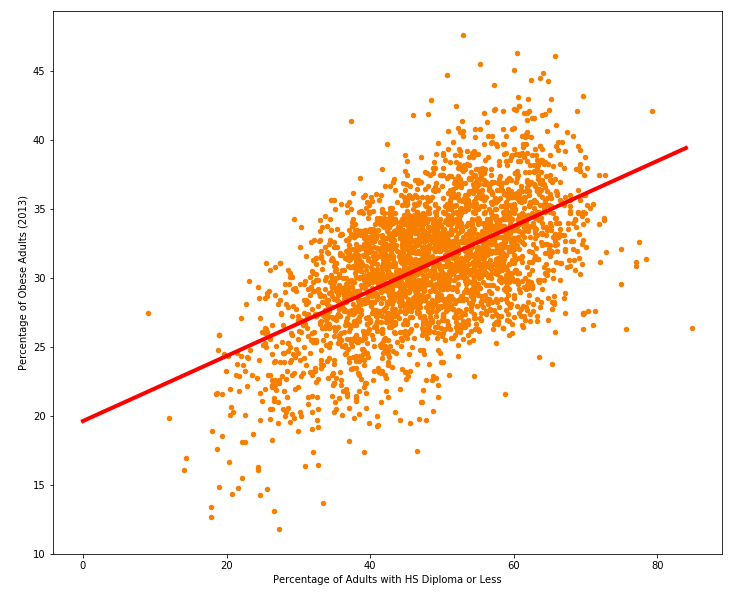

In [64]:
df.plot.scatter(x='HIGH_SCHOOL', y='ADULT_OBESITY_RATE_2013', c='#F77F00', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['HIGH_SCHOOL'].min(), df['HIGH_SCHOOL'].max())
ys =  19.6562 + 0.2355 * xs
plt.plot(xs, ys, 'r', linewidth=4, label='Model')

plt.xlabel('Percentage of Adults with HS Diploma or Less\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

To assess the correlation of education level with obesity, we divided education levels into two distinct categories: (1) Adults with a high school diploma or less and (2) Adults with some college or a Bachelor’s degree. From this we obtained the school completion rates of adults by county, allowing us to run a regression analysis and determine the extent to which education and obesity are correlated.

The P-value for Percentage of adults with HS diploma or less is is 0.0, which is enough evidence to refute the null hypothesis with a threshold of 0.05. The coefficient of 0.2355 ± 0.006 shows a positive correlation between the percentage of adults with high school and obesity levels. Our regression model accounts for 31% of the the variance in our data.

Unlike our other graphs, this regression shows a positive correlation because this category includes only adults who completed high school or less. Therefore, it is very likely that adults who do not fit under this category have higher educational attainments. A lower population density for “Percentage of Adults with HS diploma or less” most likely includes adults with higher education, which is why their obesity rates are lower. As we move along the x-axis, we see a higher population density for adults who ONLY completed high school or less, which is why their obesity rates are higher and why we see a positive correlation. 

## Obesity Rate vs. Percentage with 'Some College' and 'Bachelor's Degree or Higher'

Here, we plot the obesity rate against the percentage of adults in a county that have some college, an associate's, a bachelor's or higher. This is to give us an idea how a population's education level might affect obesity rates.

In [65]:
# OLS Regression for at least having some college
outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ COLLEGE', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.310
Model:                                 OLS   Adj. R-squared:                  0.310
Method:                      Least Squares   F-statistic:                     1409.
Date:                     Mon, 10 Jun 2019   Prob (F-statistic):          4.70e-255
Time:                             13:32:12   Log-Likelihood:                -8609.1
No. Observations:                     3140   AIC:                         1.722e+04
Df Residuals:                         3138   BIC:                         1.723e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
In

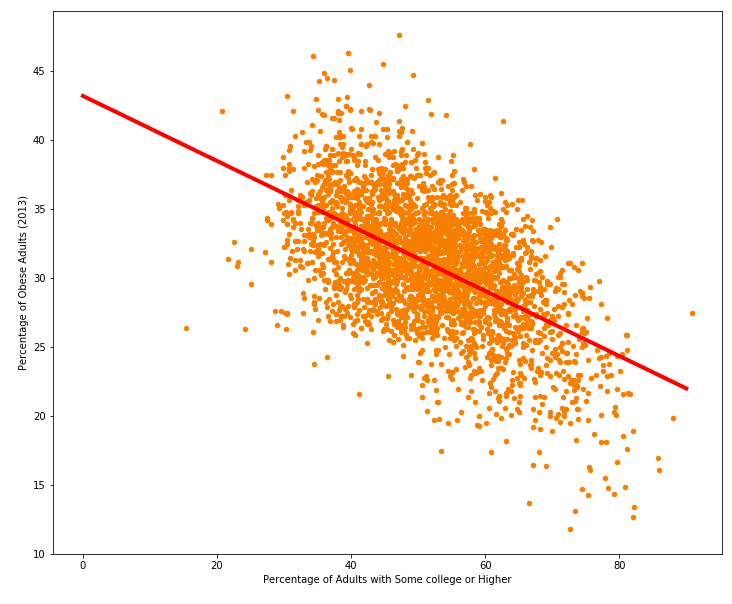

In [66]:
df.plot.scatter(x='COLLEGE', y='ADULT_OBESITY_RATE_2013', c='#F77F00', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['COLLEGE'].min(), df['COLLEGE'].max())
ys =  43.2093 - 0.2355 * xs
plt.plot(xs, ys, 'r', linewidth=4, label='Model')

plt.xlabel('Percentage of Adults with Some college or Higher\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

The P-value for Percentage of adults with some college or higher is 0.0, which is enough evidence to refute the null hypothesis with a threshold of 0.05, meaning that there is a significant correlation between obesity levels and education levels. 
The coefficient of  -0.2355 ± 0.006 shows a negative correlation between adults with some college or higher and obesity levels.
Our regression model accounts for 31% of the the variance in our data. This is in accordance with our hypothesis that lower education levels are correlated with higher obesity rates.

## Obesity Rate vs. Median Household Income 2015

In [67]:
# OLS Regression for Median Household Income

outcome, predictors = patsy.dmatrices('ADULT_OBESITY_RATE_2013 ~ Median_household_income_2015', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                               OLS Regression Results                              
Dep. Variable:     ADULT_OBESITY_RATE_2013   R-squared:                       0.213
Model:                                 OLS   Adj. R-squared:                  0.213
Method:                      Least Squares   F-statistic:                     851.1
Date:                     Mon, 10 Jun 2019   Prob (F-statistic):          9.35e-166
Time:                             13:32:19   Log-Likelihood:                -8810.0
No. Observations:                     3139   AIC:                         1.762e+04
Df Residuals:                         3137   BIC:                         1.764e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

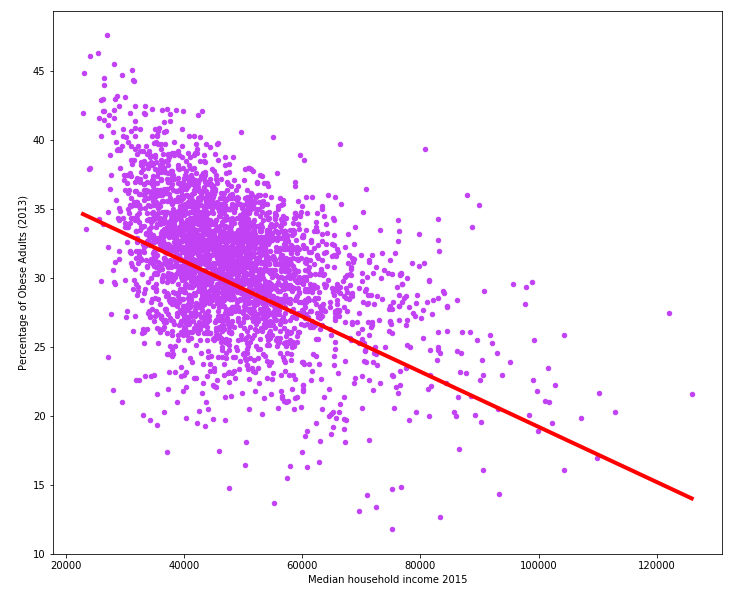

In [68]:
df.plot.scatter(x='Median_household_income_2015', y='ADULT_OBESITY_RATE_2013', c='#c141f4', figsize=(12,10))

# Plot model fit line
xs = np.arange(df['Median_household_income_2015'].min(), df['Median_household_income_2015'].max())
ys =  39.2282 -0.0002 * xs
plt.plot(xs, ys, 'r', linewidth=4, label='Model')

plt.xlabel('Median household income 2015\n')
plt.ylabel('\nPercentage of Obese Adults (2013)')
plt.show()

Originally planned to omit income as an independent variable in order to focus on non-traditional factors that affect obesity. However, we found that income was a confounding variable affecting population distribution and location and consequently, access to gyms and grocery stores. We decided to account for this by assessing the impact of income levels on obesity and comparing this to our other variables. Our regression analysis in fact shows a strong correlation between median household income and obesity rates with a P value of 0.0

The P-value for median household income is 0.0, which is enough evidence to refute the null hypothesis with a threshold of 0.05, meaning that there is a significant correlation between obesity and income levels. The coefficient -0.0002 shows a negative correlation between income and obesity levels, indicating that low income populations typically show higher obesity rates. Our regression model accounts for 21.3% of the variance in our data. 

## Geospatial Maps

To give us a more visual representation of this data and find potential correlations between areas, below are each of the variables plotted on a map of the USA.

### Adult Obesity Rate

In [69]:
colorscale = ["#CDF1DA", "#B7EAD0", "#A1E3CA", "#8CDCC7", "#77D4C7", "#63CCCA", "#4EB7C4", 
              "#3A9DBB", "#2780B2", "#1361A9", "#114EA1", "#0F3C98", "#0D2C90", "#0B1D87", 
              "#0A0F7E", "#0D0875", "#15076C", "#1B0563", "#21045A" ]

fig = ff.create_choropleth(
    fips=df['FIPS'].tolist(), 
    values=df['ADULT_OBESITY_RATE_2013'].tolist(),
    binning_endpoints = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5, 50], 
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True,
    centroid_marker={'opacity': 0},
    asp=2.9, 
    title='Adult Obesity Rate',
    legend_title='% Adults Obese'
)

# Map does not show in PDF, inserting an image instead
# iplot(fig, filename='choropleth_full_usa_adult_obesity_rate')

NameError: name 'ff' is not defined

![Adult Obesity Rate](map-images/adult-obesity-rate.png)

### Recreation/Fitness Facilities

In [ ]:
fig2 = ff.create_choropleth(
    fips=df['FIPS'].tolist(), 
    values=df['RECREATION_FITNESS_FACIL_PER1000_2014'].tolist(),
    binning_endpoints = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85], 
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True,
    centroid_marker={'opacity': 0},
    asp=2.9, 
    title='Recreation/Fitness Facilities Per 1000 People',
    legend_title='# of Rec/Fitness per 1000'
)

# Map does not show in PDF, inserting an image instead
# iplot(fig2, filename='choropleth_full_usa_rec_fitness_per_1000')

![Rec-Fit-Facilities-Per-1000](map-images/rec-fit-facilities-per-1000.png)

### Grocery Stores

In [ ]:
fig3 = ff.create_choropleth(
    fips=df['FIPS'].tolist(), 
    values=df['GROC_STORES_PER1000_2014'].tolist(),
    binning_endpoints = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0], 
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True,
    centroid_marker={'opacity': 0},
    asp=2.9, 
    title='Number of Grocery Stores per 1000 People (2014)',
    legend_title='# of Groc Stores per 1000'
    
)

# Map does not show in PDF, inserting an image instead
# iplot(fig3, filename='choropleth_full_usa_groc_per_1000')

![Num-Groc-Stores-Per-1000](map-images/num-groc-stores-per-1000.png)

### Some College

In [ ]:
fig4 = ff.create_choropleth(
    fips=df['FIPS'].tolist(), 
    values=df['COLLEGE'].tolist(),
    binning_endpoints = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90], 
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True,
    centroid_marker={'opacity': 0},
    asp=2.9, 
    title='% of Adults with Some College or Higher',
    legend_title='% Some College'
    
)

# Map does not show in PDF, inserting an image instead
# iplot(fig4, filename='choropleth_full_usa_some_college')

![Percent-Adult-Some-College](map-images/percent-adult-some-college.png)

## Median Income

In [ ]:
fig5 = ff.create_choropleth(
    fips=df['FIPS'].tolist(), 
    values=df['Median_household_income_2015'].tolist(),
    binning_endpoints = [20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 
                         65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000], 
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True,
    centroid_marker={'opacity': 0},
    asp=2.9, 
    title='Median Household Income',
    legend_title='$'
)

# Map does not show in PDF, inserting an image instead
# iplot(fig5, filename='choropleth_full_usa_median_income')

![Median-Household-Income](map-images/median-household-income.png)

# Ethics & Privacy

The dataset we will be using is publically available to anyone and is taken from a government agency United States Department of Agriculture(USDA) meaning that the dataset complies with CIPSEA implementation guidance, which ensures the anonymity of the dataset. CIPSEA stands for Confidential Information Protection and Statistical Efficiency Act. USDA has a detailed report on activities related to CIPSEA, and in this report it states that USDA and its agents involved in research cannot access participants’ names, addresses, or other personally identifiable information for the purpose of protecting respondent confidentiality. Thus from this information we can conclude there is no personal identification information concerns in the datasets we are using. In addition, all USDA Economic Research Service employees involved in the data collection process were required to complete confidentiality training, pass a test on CIPSEA procedures, and sign a form confirming that they have read the ERS CIPSEA training package, understand their duties to maintain confidentiality with ERS data, and know the Federal penalties for disclosure of confidential information.

Both datasets we will be analyzing collected data from various counties across the United States. It is stated in the CIPSEA report that the survey used includes nationally representative data from 4,826 households, including Supplemental Nutrition Assistance Program (SNAP) households, low-income households not participating in SNAP, and higher income households. This makes it a representative data set with less collection bias. 

As of right now there aren’t any specific issues we can think of that are potentially problematics in terms of data privacy and equitable impact, since the data is collected nation wide and includes every type of household. Moreover, since agents involved in the data collection process do not have access to personal information, they cannot pick or favor specific populations during the collection process, and thus we are confident our data is unbiased. 

# Conclusion & Discussion

Through this analysis, we showed a correlation between obesity and three different factors: education level, grocery store accessibility, and gym accessibility. Using a linear regression analysis, we found a negative correlation between all three variables, the strongest one being education level, followed by gym and grocery store accessibility. In other words, there is a prevalence of high obesity rates in populations with limited access to gyms and grocery stores. Similarly, high obesity rates are most common amongst populations with low educational attainment. The geographic distribution of obesity further illustrates our hypothesis; areas with low obesity are populated by individuals with higher education levels and vice versa. 

We originally intended to exclude socio-economic status as an influencing factor in the hopes of identifying other non-traditional factors that directly influence diet and lifestyle choices. However, we found income to be a confounding variable in our results. We compared income distribution with obesity rates in the United States and found a clear inverse correlation with a variance of 21.3%, suggesting that socio-economic status is an underlying factor in our analysis. We accounted for the effect of income on obesity only to assess the degree to which it influenced our results. After running a regression analysis we confirmed that indeed, income is strongly linked to obesity just as our original variables. We then removed the effect of income to focus on gym accessibility, education levels, and grocery store accessibility. 

Access to fitness facilities, grocery stores, and educational attainment are all contributing factors to obesity. However, we found that education and income have the greatest influence on obesity rates, suggesting that neighborhoods with low accessibility to gyms and grocery stores have a low-income population. This in turn has to do with educational attainment, which is a good indicator for socio-economic status. High income individuals are able to afford housing in more affluent neighborhoods with amenities such as fitness facilities and fresh food super markets. They are also more likely to make healthy lifestyle choices coming from a high educational background. On the other hand, individuals with lower socio-economic status lack the resources and education to make healthy and informed lifestyle choices. They are primarily affected by low access to fresh foods and fitness facilities due to their geographic location, which in turn is affected by income levels. Our results show that increased nutritional problems may be a consequence of the income inequality gap in our country. 

There are limitations to our analysis and datasets. Our analysis failed to examine and account for the different quality and affordability of grocery stores and recreation/fitness facilities. Some grocery stores may offer limited options, which plays an effect on the shopper's health. For low income households living in a high income neighborhoods, grocery store prices may not be affordable for them; thus turning them to unhealthy food options. Overall, we were able to identify the factors that most strongly predict obesity in the United States based on geographic location and education levels. However, we recognize the variability in health and lifestyle choices which cannot be captured through census data. 